In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/banking/banking.csv


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.io as pio
import plotly.express as ex
import plotly.graph_objs  as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [3]:
df=pd.read_csv('../input/banking/banking.csv')
df.sample(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
32047,29,services,married,secondary,no,690,yes,no,cellular,14,apr,553,2,316,1,other,no
4160,49,blue-collar,married,primary,no,284,yes,no,unknown,19,may,81,1,-1,0,unknown,no
43455,56,technician,married,secondary,no,147,no,no,cellular,12,apr,203,1,-1,0,unknown,no
17015,39,housemaid,married,secondary,no,42,yes,no,telephone,25,jul,120,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.shape

(45211, 17)

In [6]:
# there are 45211 rows in the table, we cannot view everything, so we will lowercase all columns containing words
df['education']=df['education'].str.lower()
df['job']=df['job'].str.lower()
df['marital']=df['marital'].str.lower()

In [7]:
print ('The max of age is ',df['age'].max())
print('The min age is' , df['age'].min())
# As you see, the resut is reasonable and no need to use (abs)

The max of age is  95
The min age is 18


In [8]:
print('the max duration ', df['duration'].max())
print('the min duration ', df['duration'].min())
# As you see, the resut is reasonable and no need to use (abs)

the max duration  4918
the min duration  0


In [9]:
def balance_category(df):
    
    if df['balance']<= 5000:
        return 'low balance'
    
    elif df['balance']<= 15000:
        return 'average balance'
    
    else:
        return 'high balance'

df['balance_category'] =df.apply(balance_category, axis=1)


df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balance_category
27967,37,blue-collar,married,secondary,no,417,no,no,cellular,28,jan,389,1,181,5,failure,no,low balance
30949,34,unemployed,married,tertiary,no,582,yes,no,cellular,9,feb,189,3,-1,0,unknown,no,low balance
23152,45,management,married,tertiary,no,10,no,no,cellular,26,aug,133,7,-1,0,unknown,no,low balance
18224,37,admin.,single,tertiary,no,869,no,no,cellular,30,jul,60,8,-1,0,unknown,no,low balance
42186,45,management,married,tertiary,no,160,no,no,cellular,10,nov,182,2,194,1,success,yes,low balance


In [10]:
def purpose(df):
    
    if df['y']=='no':
        return "can not get a credit"
    else:  
        return "can get a credit"
    
df['purpose'] =df.apply(purpose, axis=1)


df.sample(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balance_category,purpose
5064,35,management,married,tertiary,no,1631,yes,no,unknown,21,may,83,2,-1,0,unknown,no,low balance,can not get a credit
16523,38,entrepreneur,married,tertiary,no,0,no,no,cellular,23,jul,532,2,-1,0,unknown,yes,low balance,can get a credit
24541,46,management,married,tertiary,no,189,yes,no,cellular,17,nov,111,1,-1,0,unknown,no,low balance,can not get a credit
34871,37,technician,married,secondary,no,83,yes,no,cellular,6,may,68,1,363,1,failure,no,low balance,can not get a credit


In [11]:
def poutcome(df):
    if df['poutcome']=='unknown':
        return "Under consideration"
    elif df['poutcome']=='failure':
        return 'failure'
    elif df['poutcome']=='other':
        return 'other'
    else:
        return 'success'
    
    
df['poutcome']=df.apply(poutcome,axis=1)

df.sample(6)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balance_category,purpose
38202,35,blue-collar,divorced,secondary,no,286,yes,no,cellular,15,may,158,1,365,4,other,no,low balance,can not get a credit
12117,46,blue-collar,married,secondary,no,137,no,no,unknown,20,jun,252,3,-1,0,Under consideration,no,low balance,can not get a credit
10310,53,housemaid,divorced,secondary,no,292,no,no,unknown,12,jun,92,2,-1,0,Under consideration,no,low balance,can not get a credit
5840,49,technician,divorced,secondary,no,-236,yes,no,unknown,26,may,204,2,-1,0,Under consideration,no,low balance,can not get a credit
598,48,technician,married,tertiary,no,310,no,no,unknown,6,may,135,1,-1,0,Under consideration,no,low balance,can not get a credit
44780,72,admin.,married,primary,no,2321,no,no,cellular,14,sep,221,2,64,12,failure,yes,low balance,can get a credit


In [12]:
# we drop the 3 columns that we do not need it at all
df.drop(columns=['default','pdays','previous','y'],inplace=True)
df.sample(5)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome,balance_category,purpose
23546,34,technician,married,secondary,1,no,no,cellular,28,aug,535,2,Under consideration,low balance,can get a credit
18741,35,blue-collar,single,unknown,2298,no,no,cellular,31,jul,92,4,Under consideration,low balance,can not get a credit
24845,38,technician,married,tertiary,2453,yes,yes,cellular,18,nov,108,1,Under consideration,low balance,can not get a credit
5239,31,blue-collar,married,secondary,360,yes,no,unknown,23,may,395,1,Under consideration,low balance,can not get a credit
20639,30,management,single,tertiary,9634,no,no,cellular,12,aug,781,5,Under consideration,average balance,can not get a credit


In [13]:
# Make sure that the numerical values are integer
df['balance']=df['balance'].astype('int')
df['duration']=df['duration'].astype('int')

In [14]:
# Distribute the data into numerical and categorical 
cat_cols=df.select_dtypes(include='object')
num_cols=df.select_dtypes(exclude='object')

In [15]:
cat_cols.describe()

,job,marital,education,housing,loan,contact,month,poutcome,balance_category,purpose
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,3,12,4,3,2
top,blue-collar,married,secondary,yes,no,cellular,may,Under consideration,low balance,can not get a credit
freq,9732,27214,23202,25130,37966,29285,13766,36959,42366,39922


*We see on the top that  the most popular job is Blue Collar and most of thema are married and they have secondary education, most of them have house and their contact is cellullar and they can not get credit from bank* 

In [16]:
# we use the numerical columns and define all columns 
num_cols.describe ()

,age,balance,day,duration,campaign
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841
std,10.618762,3044.765829,8.322476,257.527812,3.098021
min,18.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


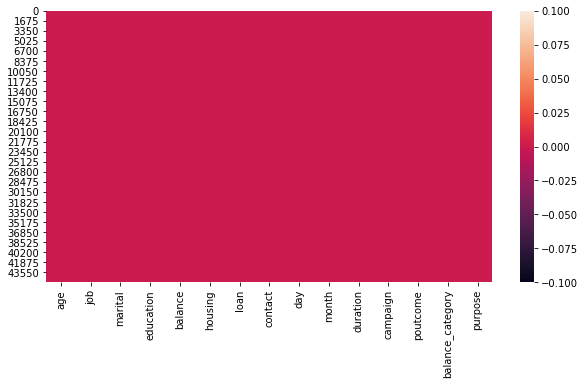

In [17]:
# we figure out the missing values that we do mot have 
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull());

In [18]:
target=df[df['purpose']=='can get a credit']
non_target=df[df['purpose']=='can not get a credit']

In [19]:
#we use this part for analyzing the data based on y
target_cols=['purpose']
cat_cols=df.nunique()[df.nunique()<10].keys().tolist()
cat_cols=[x for x in cat_cols if x not in target_cols]
num_col=[x for x in df.columns if x not in cat_cols+ target_cols]

In [20]:
df['job'].value_counts(normalize=True)*100
# most people are working as Blue collar

blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64

In [21]:
df['marital'].value_counts(normalize=True)*100
# Most of the people who want to get credit are married

married     60.193316
single      28.289576
divorced    11.517109
Name: marital, dtype: float64

In [22]:
df['education'].value_counts(normalize=True)*100
# Most of the people who got credit have secondary education

secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: education, dtype: float64

In [23]:
df['housing'].value_counts()
# Most of the people who got credit have their own house 

yes    25130
no     20081
Name: housing, dtype: int64

In [24]:
df['loan'].value_counts()
# Most of the people who got credit have not  loan before  

no     37966
yes     7245
Name: loan, dtype: int64

In [25]:
df['purpose'].value_counts()
# Most of the people can not get credit  

can not get a credit    39922
can get a credit         5289
Name: purpose, dtype: int64

In [26]:
# We divided 
df.groupby('marital')['balance'].mean()

marital
divorced    1178.872287
married     1425.925590
single      1301.497654
Name: balance, dtype: float64

In [27]:
# As you see, most retired people have more balance in their bank
df.groupby('job')['balance'].mean().sort_values(ascending=False)

job
retired          1984.215106
unknown          1772.357639
management       1763.616832
self-employed    1647.970868
unemployed       1521.745971
entrepreneur     1521.470074
housemaid        1392.395161
student          1388.060768
technician       1252.632092
admin.           1135.838909
blue-collar      1078.826654
services          997.088108
Name: balance, dtype: float64

In [28]:
#As you see, most  people who have can not get credit , their balance is almost 1804 $ and people who can not get credit, their balance is 1303$
df.groupby('purpose')['balance'].mean().sort_values(ascending=False)

purpose
can get a credit        1804.267915
can not get a credit    1303.714969
Name: balance, dtype: float64

In [29]:
#As you see, most  people who have tertiary education have more balance in their bank
df.groupby('education')['balance'].mean().sort_values(ascending=False)

education
tertiary     1758.416435
unknown      1526.754443
primary      1250.949934
secondary    1154.880786
Name: balance, dtype: float64

In [30]:
# we see that, most of the people have low balance in their account 
df['balance_category'].value_counts()

low balance        42366
average balance     2494
high balance         351
Name: balance_category, dtype: int64

In [31]:
df.head(5)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome,balance_category,purpose
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,Under consideration,low balance,can not get a credit
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,Under consideration,low balance,can not get a credit
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,Under consideration,low balance,can not get a credit
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,Under consideration,low balance,can not get a credit
4,33,unknown,single,unknown,1,no,yes,unknown,5,may,198,1,Under consideration,low balance,can not get a credit


In [32]:
#Find the median and count of the maritial with their balances which most od the people are married and married has the highest median 
info_maritial=pd.pivot_table(df,index=['marital'],values='balance',aggfunc=['median', 'count'])
info_maritial.columns=['median','count']
info_maritial.head()

,median,count
marital,,
divorced,348,5207
married,477,27214
single,437,12790


Text(0.5, 1.0, 'distribute educated people by their balance ')

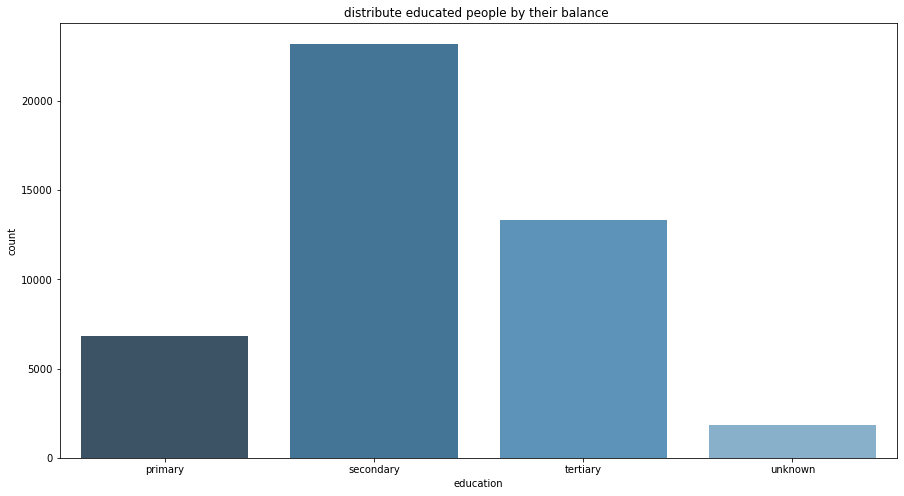

In [33]:
#Find the median and count of the education with their balances which Secondary has the highest amount and tertiary has the highets median
info_education=pd.pivot_table(df,index=['education'],values='balance',aggfunc='count')
info_education.columns=['count']
info_education.head()

f, ax = plt.subplots(figsize=(15, 8))
ax = sns.barplot(x=info_education.index, y="count", data=info_education, palette="Blues_d")
plt.title('distribute educated people by their balance ')

In [34]:
df['job'].unique()
job_balance_category=pd.crosstab(df['job'],df['balance_category'])
job_balance_category

balance_category,average balance,high balance,low balance
job,,,
admin.,190,24,4957
blue-collar,417,35,9280
entrepreneur,79,25,1383
housemaid,61,11,1168
management,738,134,8586
retired,167,33,2064
self-employed,110,17,1452
services,168,9,3977
student,60,4,874


*As you see, we distribute the Job with range of balance.the average balance is for blue collar and  high balance is for management and low balance is for blue collor*

In [35]:
# As you see, the average balance is for married and night and low has the highest percentage 
df['marital'].unique()
age_marital=pd.crosstab(df['marital'],df['balance_category'])
age_marital

balance_category,average balance,high balance,low balance
marital,,,
divorced,228,35,4944
married,1577,230,25407
single,689,86,12015


In [36]:
# the people who can get a credit have secondary and people who can not get ready, secondary
df['education'].unique()
education_purpose=pd.crosstab(df['education'],df['purpose'])
education_purpose

purpose,can get a credit,can not get a credit
education,,
primary,591,6260
secondary,2450,20752
tertiary,1996,11305
unknown,252,1605


In [37]:
# the people who can get a credit have secondary and people who can not get ready, secondary
df['job'].unique()
job_poutcome=pd.crosstab(df['job'],df['poutcome'])
job_poutcome

poutcome,Under consideration,failure,other,success
job,,,,
admin.,4083,643,241,204
blue-collar,8115,1068,401,148
entrepreneur,1262,164,39,22
housemaid,1088,97,26,29
management,7634,1044,393,387
retired,1777,230,83,174
self-employed,1298,165,61,55
services,3448,444,177,85
student,653,117,81,87


In [38]:
# we distribute poutcome, the Under consideration has the highest % can get a credit and can not get a credit also Under consideration has the highest %
df['poutcome'].unique()
poutcome_purpose=pd.crosstab(df['poutcome'],df['purpose'])
poutcome_purpose

purpose,can get a credit,can not get a credit
poutcome,,
Under consideration,3386,33573
failure,618,4283
other,307,1533
success,978,533


In [39]:
df_grouped_sum=df.groupby('marital',as_index=False)['age'].agg('sum').rename(columns={'age':'age_Sum'})
df_grouped_cnt=df.groupby('marital',as_index=False)['age'].agg('count').rename(columns={'age':'age_Count'})

# Mege the 2 lines 
df_grouped_average=df_grouped_sum.merge(df_grouped_cnt,left_on='marital',right_on='marital',how='inner')

#for missing values
df_grouped_average.loc[:,'Average of Age']=df_grouped_average['age_Sum']/df_grouped_average['age_Count']
#the final result

df_grouped_average.sort_values('age_Sum',ascending=True)


,marital,age_Sum,age_Count,Average of Age
0,divorced,238392,5207,45.782984
2,single,431067,12790,33.703440
1,married,1181308,27214,43.408099


*We found out the average of the people who are divorced is 45.78 years old and for single is 33.70 and for married people is 43.40*

In [40]:
df_grouped_sum=df.groupby('housing',as_index=False)['balance'].agg('sum').rename(columns={'balance':'balance_Sum'})
df_grouped_cnt=df.groupby('housing',as_index=False)['balance'].agg('count').rename(columns={'balance':'balance_Count'})

df_grouped_average=df_grouped_sum.merge(df_grouped_cnt,left_on='housing',right_on='housing',how='inner')

df_grouped_average.loc[:,'Average of balance']=df_grouped_average['balance_Sum']/df_grouped_average['balance_Count']

df_grouped_average.sort_values('balance_Sum',ascending=False)

,housing,balance_Sum,balance_Count,Average of balance
0,no,32059342,20081,1596.501270
1,yes,29530340,25130,1175.103064


*like the previous code, we found out the people who have hosing ,their average balance is 1175$ and for people who do not have house is 1596$*

# We want to know that the Data Analyst in some main state is so demanding.

In [41]:
def number_of_job(df, job ,balance_category):
    number_list=df[(df['job']==job) & (df['balance_category']==balance_category)]
    number_list_count=number_list['education'].count()
    return number_list_count

In [42]:
# we have 42 Technician with high balance amount of $
number_of_job(df,'technician','high balance')

42

In [43]:
# we have 9280 people who are blue collar with low balance.
number_of_job(df,'blue-collar','low balance')

9280

In [44]:
#the students with average 
number_of_job(df,'student','average balance')

60

# 2- Data analysis

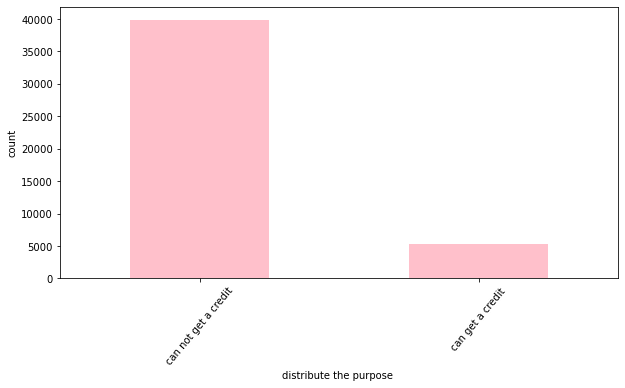

In [45]:
plt.rcParams['figure.figsize']=(10,5)
df['purpose'].value_counts().sort_values(ascending=False).plot.bar(color='pink')
plt.xlabel('distribute the purpose ')
plt.ylabel('count')
plt.xticks(rotation=50)
plt.show()
# As you see, most of the people can not get a credit(almost 40000 of them )

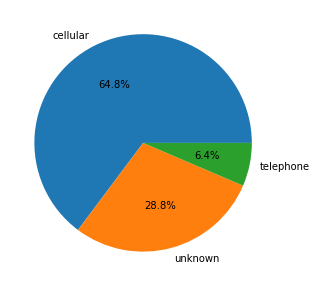

In [46]:
plt.rcParams['figure.figsize']=(18,5)
df['contact'].value_counts().sort_values(ascending=False).plot.pie(y='contact',autopct="%0.1f%%")
plt.axis('off')
plt.show()
# The most of the contract that signed was cellular and rest of them are unknown and by telephone.

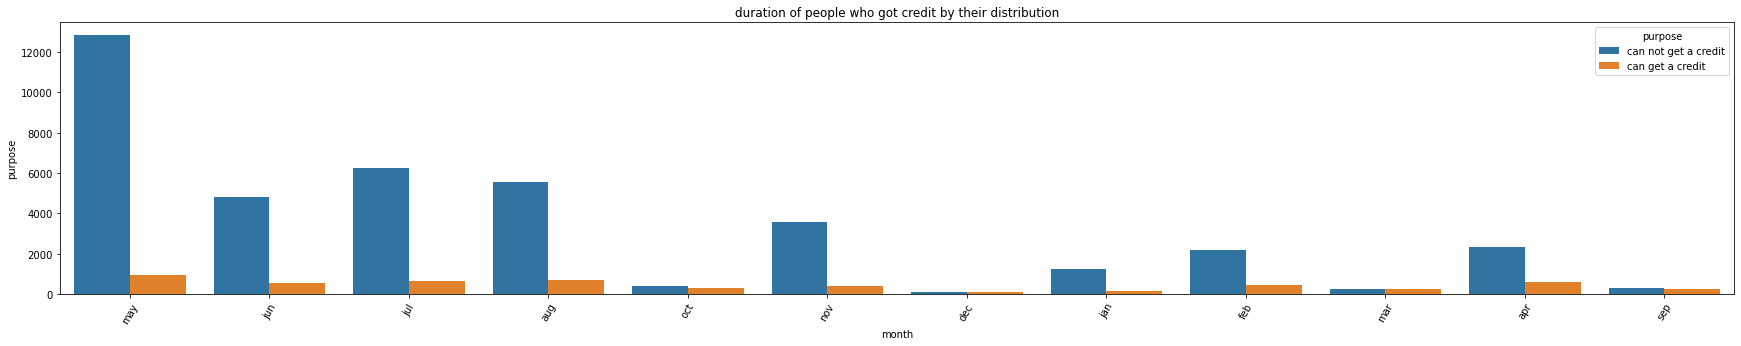

In [47]:
fig,ax=plt.subplots(figsize=(30,5))
sns.countplot(df['month'],hue=df['purpose'],ax=ax)
plt.title('duration of people who got credit by their distribution')
plt.xlabel('month')
plt.ylabel('purpose')
plt.xticks(rotation=60)
plt.show()
# As you see, most people got credut in May and and also people who can not get credit

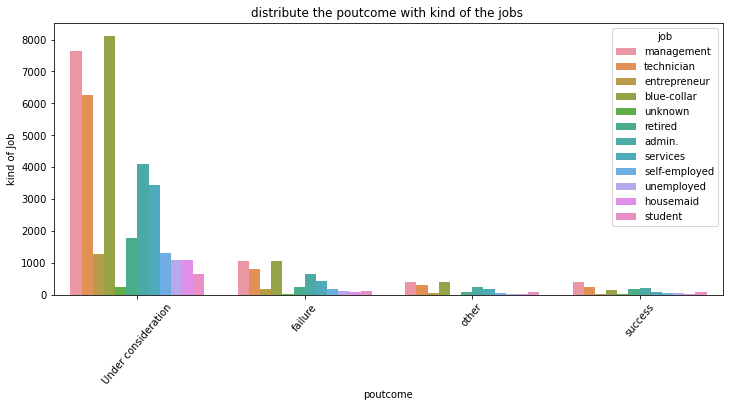

In [48]:
fig,ax=plt.subplots(figsize=(12,5))
sns.countplot(df['poutcome'],hue=df['job'],ax=ax)
plt.title('distribute the poutcome with kind of the jobs ')
plt.xlabel('poutcome')
plt.ylabel('kind of Job')
plt.xticks(rotation=50)
plt.show()
# under consideration has the highest portion and enterpreneur has the fist job is under connsideration

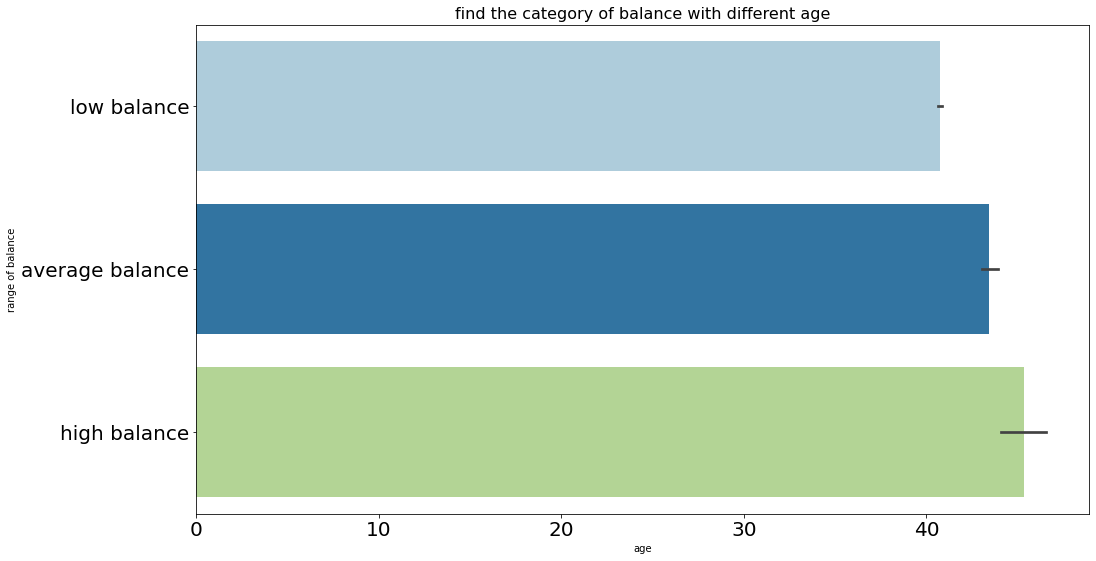

In [49]:
plt.figure(figsize=(16,9))
sns.set_palette(sns.color_palette("Paired"))
ax=sns.barplot(x='age',y='balance_category',data=df, orient='h')
ax.axes.set_title('find the category of balance with different age',fontsize=16)
ax.set_xlabel('age')
ax.set_ylabel('range of balance')
sns.color_palette("Set2")
ax.tick_params(labelsize=20)
# we see below that high balance has the highest range from the range over 40 years old

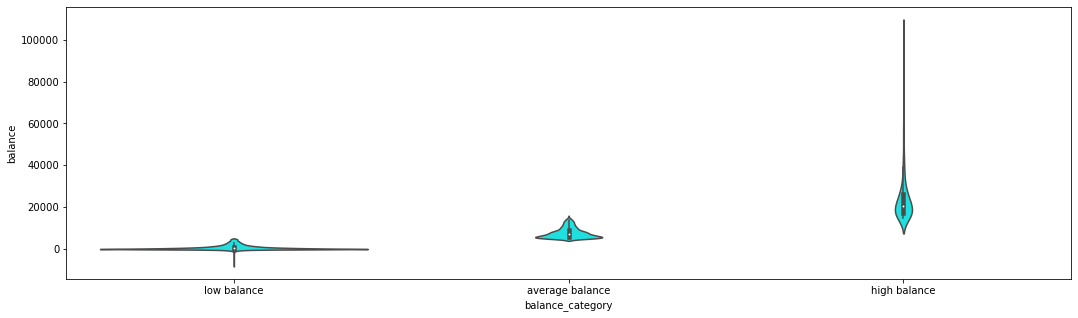

In [50]:
sns.violinplot(x='balance_category',y='balance',data=df, color='Aqua')
# Hight balance has the highest amount of the balance 

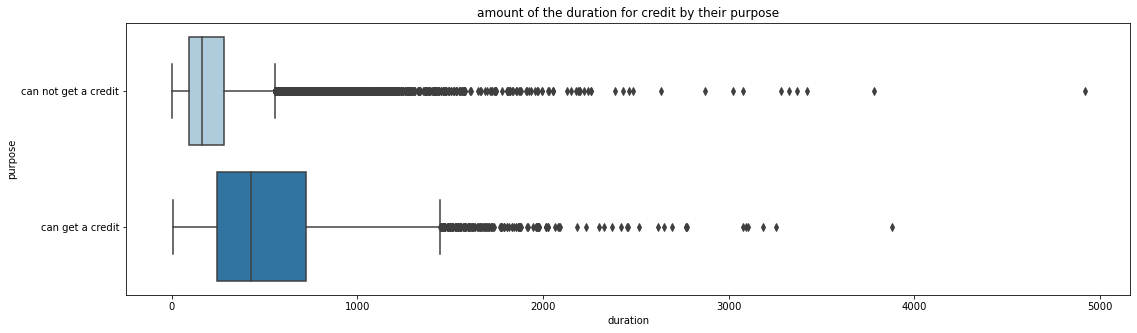

In [51]:
sns.boxplot(x='duration',y='purpose',data=df)
plt.title('amount of the duration for credit by their purpose')
plt.show()
# As you see,the duration for get a credit from bank is more than people who can not get a credit

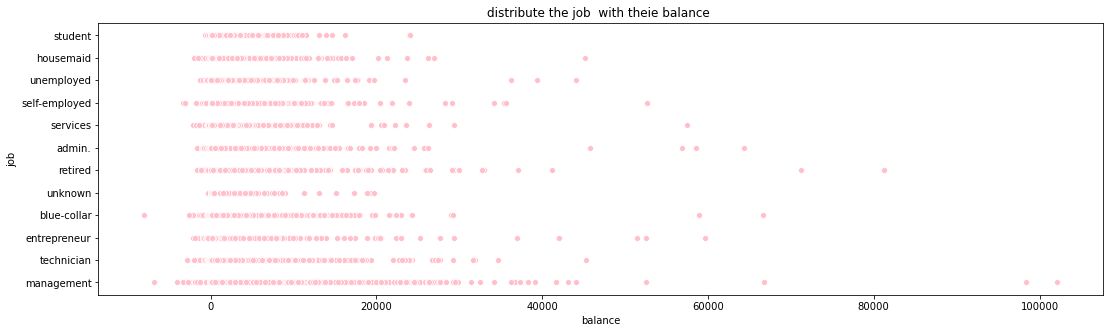

In [52]:
sns.scatterplot(x='balance',y='job',data=df, color='pink')
plt.title('distribute the job  with theie balance ')
plt.show()
# the management has the highets amount of the balance and student has the hightest amount

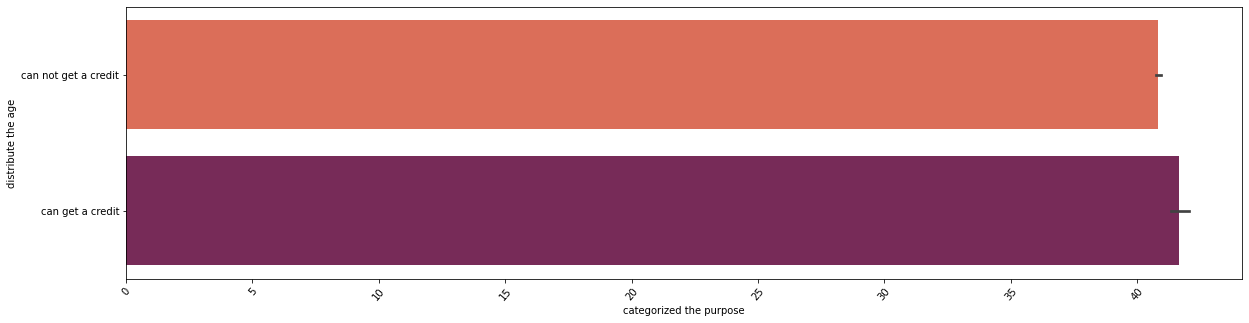

In [53]:
df.sort_values(by='purpose',ascending=False)

plt.figure(figsize=(20,5))

sns.barplot(x='age',y='purpose',data=df,palette="rocket_r")
plt.xlabel('categorized the purpose')
plt.ylabel('distribute the age')
plt.xticks(rotation=50)
plt.show()

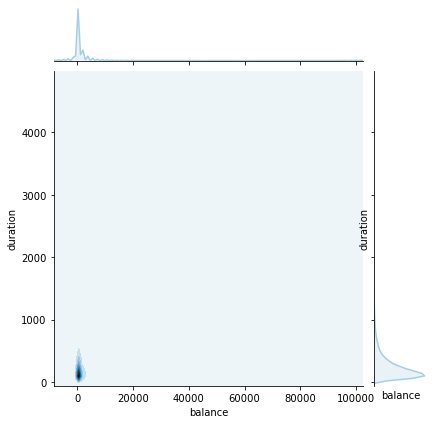

In [54]:
sns.jointplot(x='balance',y='duration',data=df, kind='kde')
plt.xlabel('balance')
plt.ylabel('duration')
plt.xticks(rotation=50)
plt.show()

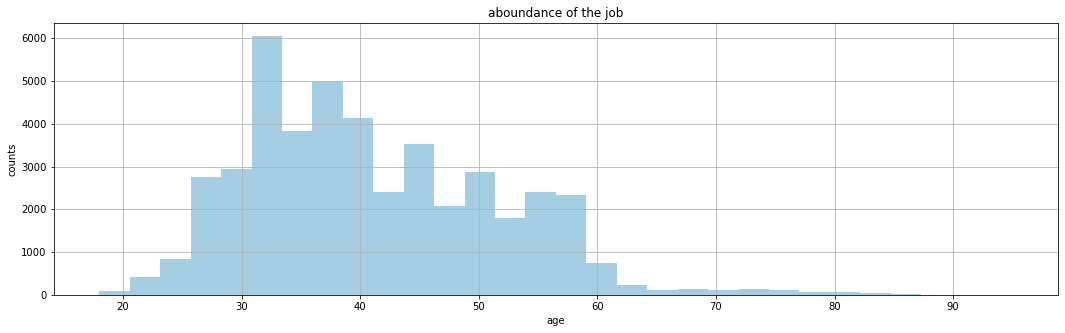

In [55]:
df['age'].hist(bins=30)
plt.xlabel('age')
plt.ylabel('counts')
plt.title('aboundance of the job')
plt.show()
# The most range of the age is almost 32, 33 years old who want to get credit from bank

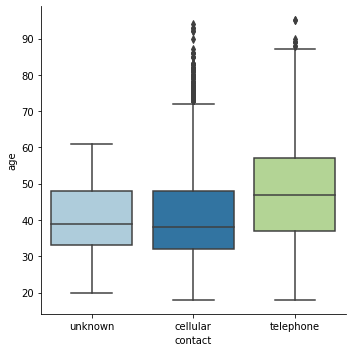

<Figure size 720x360 with 0 Axes>

In [56]:
sns.catplot(x='contact',y='age',data=df,kind='box')
plt.figure(figsize=(10,5))
plt.show()
# The age for telephone is between 40 to 60 and has the higehst portion and unknown has the lowest portion

([<matplotlib.patches.Wedge at 0x7fa60be930d0>,
 [Text(1.05100201895621, 0.32464558544660804, 'admin.'),
  Text(1.0981743044318053, 2.356695397603543, 'blue-collar'),
  Text(-0.23455727990318284, 1.074701299173133, 'entrepreneur'),
  Text(-0.9750214856182489, 2.1930191751516412, 'housemaid'),
  Text(-2.052304448115499, 0.4450241029936898, 'management'),
  Text(-0.7122951757705969, -0.8382336085924584, 'retired'),
  Text(-0.3694050205509202, -1.0361177205278242, 'self-employed'),
  Text(0.0024396501890563533, -1.5999981400323424, 'services'),
  Text(0.30315573161282905, -1.0574008711885434, 'student'),
  Text(1.9204305231399972, -1.7526969520690783, 'technician'),
  Text(1.0871141104361852, -0.1678776664435805, 'unemployed'),
  Text(2.399186546216199, -0.0624813288525945, 'unknown')],
 [Text(0.5732738285215689, 0.17707941024360435, '9.5%'),
  Text(0.8869869381949197, 1.9034847442182463, '17.0%'),
  Text(-0.12794033449264516, 0.5862007086398907, '3.7%'),
  Text(-0.7718920094477802, 1.736

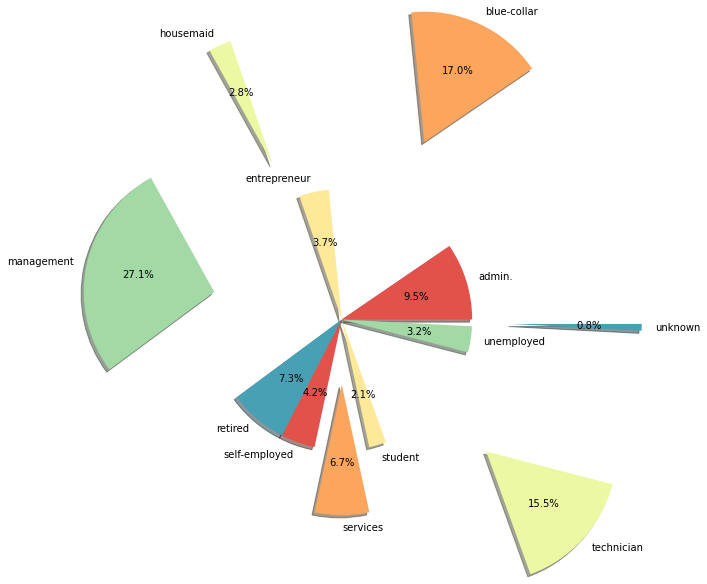

In [57]:
pm=df[['balance','job']].groupby(['job']).agg([sum])
sns.set_palette('Spectral')
plt.figure(figsize=(10,6))
plt.pie(pm['balance']['sum'], labels = pm.index, explode = (0, 1.5, 0, 1.3, 1, 0, 0, 0.5, 0, 1.5, 0, 1.3), 
        shadow = True, autopct = '%1.1f%%')

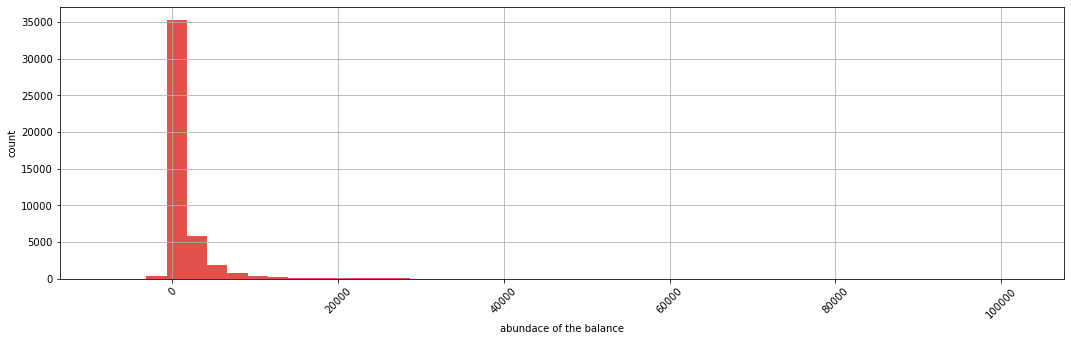

In [58]:
# build a histogram
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df['balance'].hist(bins=45)
plt.xlabel('abundace of the balance')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()
# As you see, the less abundance of the balance is from 100000 to  almost 500

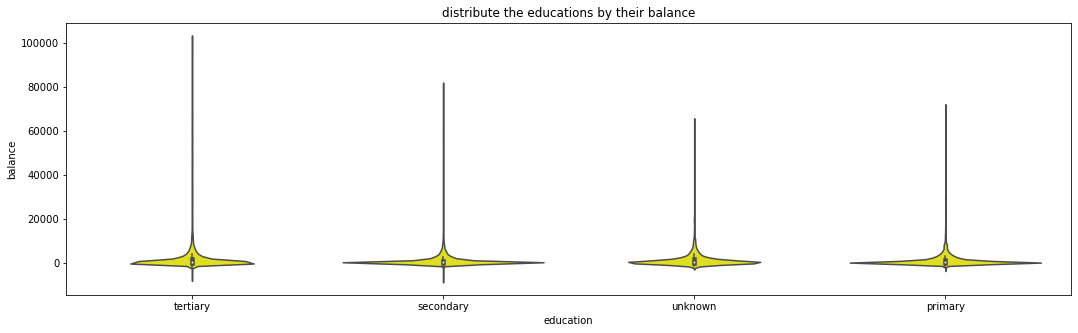

In [59]:
sns.violinplot(x='education',y='balance',data=df, color='yellow')
plt.title('distribute the educations by their balance')
plt.show()

* As you see, we distribute the educations level with their balances and tertiary has the highest range of the salary.

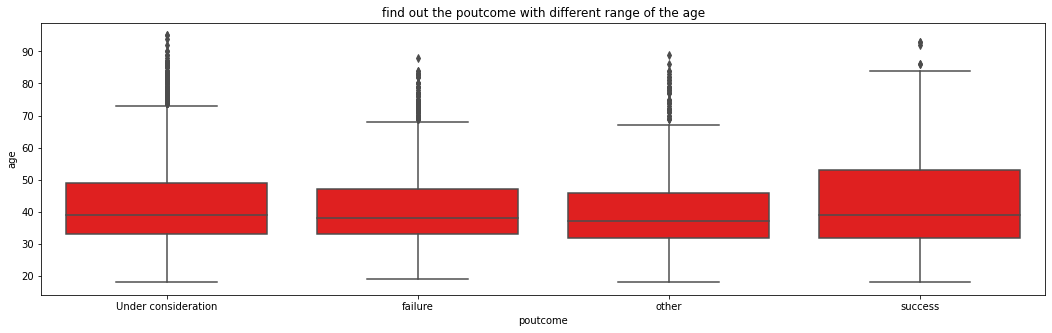

In [60]:
sns.boxplot(x='poutcome',y='age',data=df, color='red')
plt.title('find out the poutcome with different range of the age')
plt.show()
# most of the poutcome are successed and the range of the age is between 35 to 50 and the average is kind of 42 years old.

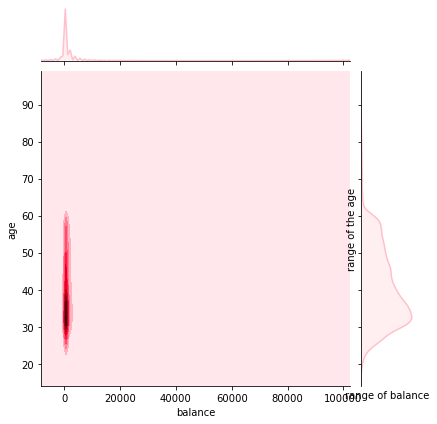

In [61]:
sns.jointplot(x='balance',y='age',data=df, kind='kde',color='pink')
plt.xlabel('range of balance')
plt.ylabel('range of the age')
plt.xticks(rotation=50)
plt.show()
# the most range of the balance is lower than 2000$ and range of the age is between 25 to 60( the highest remarkable part is 30 to 40)

# Preprocessing the data and make a model with different algorithms

In [62]:
#preprocessing 
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split

# Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier 
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Performance metrics
from sklearn import preprocessing 
from sklearn import metrics 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


In [63]:
le=preprocessing.LabelEncoder()
df.job=le.fit_transform(df.job)
df.marital=le.fit_transform(df.marital)
df.education=le.fit_transform(df.education)
df.housing=le.fit_transform(df.housing)
df.loan=le.fit_transform(df.loan)
df.contact=le.fit_transform(df.contact)
df.month=le.fit_transform(df.month)
df.poutcome=le.fit_transform(df.poutcome)
df.balance_category=le.fit_transform(df.balance_category)
df.purpose=le.fit_transform(df.purpose)

In [64]:
# we preprocess the data for making the model
df.head(5)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome,balance_category,purpose
0,58,4,1,2,2143,1,0,2,5,8,261,1,0,2,1
1,44,9,2,1,29,1,0,2,5,8,151,1,0,2,1
2,33,2,1,1,2,1,1,2,5,8,76,1,0,2,1
3,47,1,1,3,1506,1,0,2,5,8,92,1,0,2,1
4,33,11,2,3,1,0,1,2,5,8,198,1,0,2,1


In [65]:
x=df.drop(['loan','contact','day','month','duration'],axis=1)
y=df['purpose'].values

In [66]:
x.head(5)

,age,job,marital,education,balance,housing,campaign,poutcome,balance_category,purpose
0,58,4,1,2,2143,1,1,0,2,1
1,44,9,2,1,29,1,1,0,2,1
2,33,2,1,1,2,1,1,0,2,1
3,47,1,1,3,1506,1,1,0,2,1
4,33,11,2,3,1,0,1,0,2,1


In [67]:
#K_nn classifier

x_train, x_test, y_train, y_test=train_test_split( x, y , test_size=.30, random_state=1234, stratify= y)

knn= KNeighborsClassifier(n_neighbors=7)
# fit the classifier
knn.fit(x_train, y_train)
# Print the accuracy
print (knn.score(x_test, y_test))

0.8801975818342672


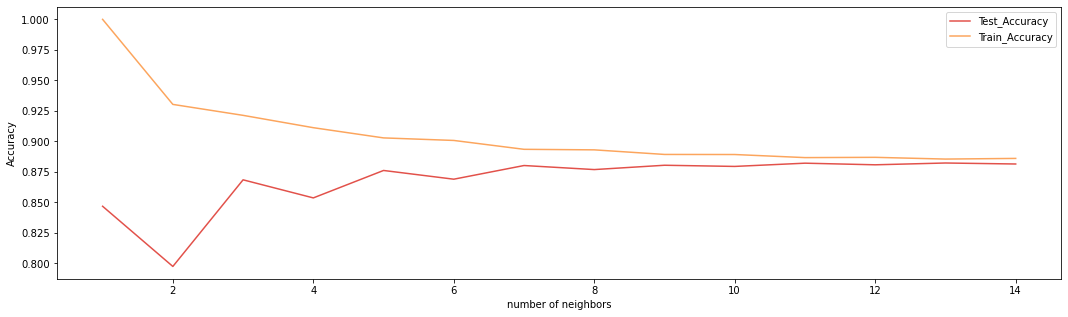

In [68]:
# we want to know the performance with train and test result
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i , k in enumerate(neighbors):
    # Train and test the model
    knn=KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    knn.fit(x_train, y_train)
    
    
    
    # Compute the accuracy
    
    train_accuracy[i] = knn.score(x_train, y_train)
        
    # compute the test
    test_accuracy[i]=knn.score(x_test, y_test)
    
    
plt.plot(neighbors , test_accuracy , label='Test_Accuracy')
plt.plot(neighbors, train_accuracy , label='Train_Accuracy')
plt.legend()
plt.xlabel('number of neighbors')
plt.ylabel('Accuracy')
plt.show()
    

In [69]:
print(x_train.shape, y_train.shape, x_test.shape , y_test.shape)

(31647, 10) (31647,) (13564, 10) (13564,)


In [70]:
# We want to define some algorithm
models=[]
models.append(('LR',LogisticRegression(random_state=12345)))
models.append(('DT',DecisionTreeClassifier(random_state=12345)))
models.append(('RF',RandomForestClassifier(random_state=12345)))
models.append(('NN',MLPClassifier(random_state=12345)))
models.append(('svm',SVC(random_state=12345)))
models.append(('KN', KNeighborsClassifier()))



result=[]
name=[]

In [71]:
#We want to find out which algorithm is the best one and has the highest percenage 
for name, model in models:
    model.fit(x_train,y_train)
    predictions=model.predict(x_test)
    accuracy=accuracy_score(y_test, predictions)
    msg = "%s: (%f)" % (name, accuracy)
    print(msg)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LR: (0.988352)
DT: (1.000000)
RF: (1.000000)
NN: (0.996756)
svm: (0.882999)
KN: (0.876143)
